In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [4]:
weather_2012 = pd.read_csv('data/weather_2012.csv', 
                           parse_dates=True, index_col='Date/Time')
weather_2012.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### String Operations

### This is part of EDA

* Suppose we want to find out the time when it snows, it would be good to plot those. 
* We extract a vectorised column of true and false.
* To plot the vectorised boolean column we change the datatype to float

In [7]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

In [8]:
is_snowing.head()

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

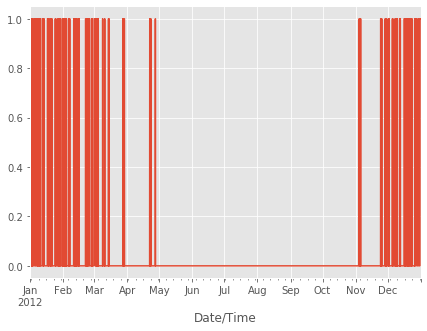

In [14]:
is_snowing = is_snowing.astype(float)
is_snowing.plot(figsize = (7,5))

### Use resampling to find various statistics

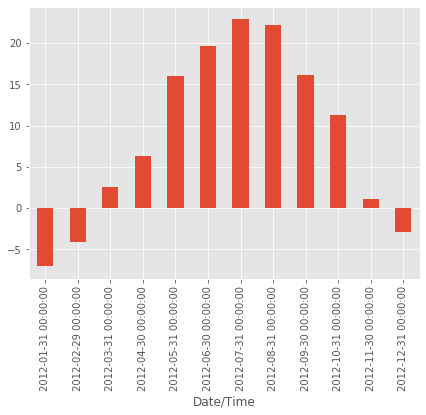

In [16]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind = 'bar', figsize = (7,5))

In [17]:
is_snowing.astype(float).head()

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
Name: Weather, dtype: float64

In [1]:
is_snowing.plot(figsize = (7,5))

NameError: name 'is_snowing' is not defined

### Using resampling to find the snowiest month

* Idea: Resample the temperature with respect to month
* Apply the median over it
* Plot the graph

Text(0.5, 0.98, 'Monthly Temperature')

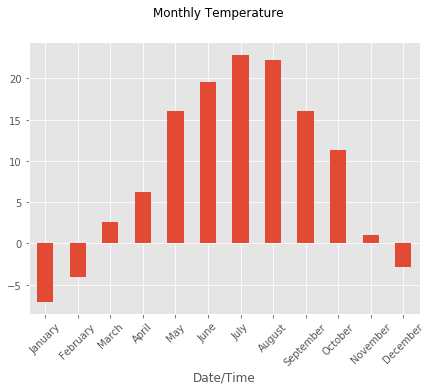

In [36]:
fig, ax = plt.subplots(figsize=(7, 5))
snow_mnthly = weather_2012['Temp (C)'].resample('M').apply(np.median)
snow_mnthly.plot(kind='bar', ax=ax)
ax.set_xticklabels(snow_mnthly.index.month_name(), rotation=45);
plt.suptitle('Monthly Temperature')

In [21]:
is_snowing.astype(float).head()

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
Name: Weather, dtype: float64

### The snowiest month is :

In [35]:
is_snowing.resample('M').apply(np.sum).idxmax().month_name()

'December'

In [22]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

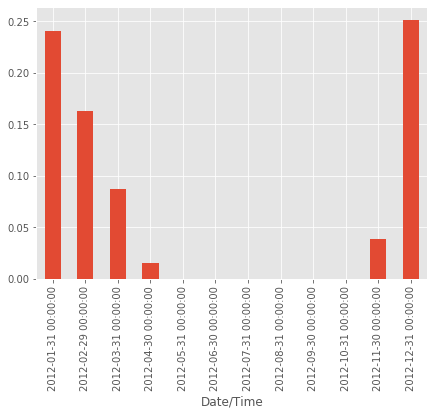

In [29]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar', figsize = (7,5))

### Plotting temperature and snowiness stats together

In [25]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

In [26]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


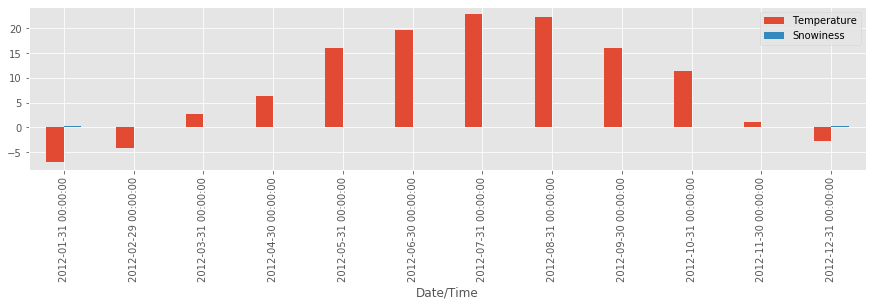

In [27]:
stats.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019268C767C8>,
      dtype=object)

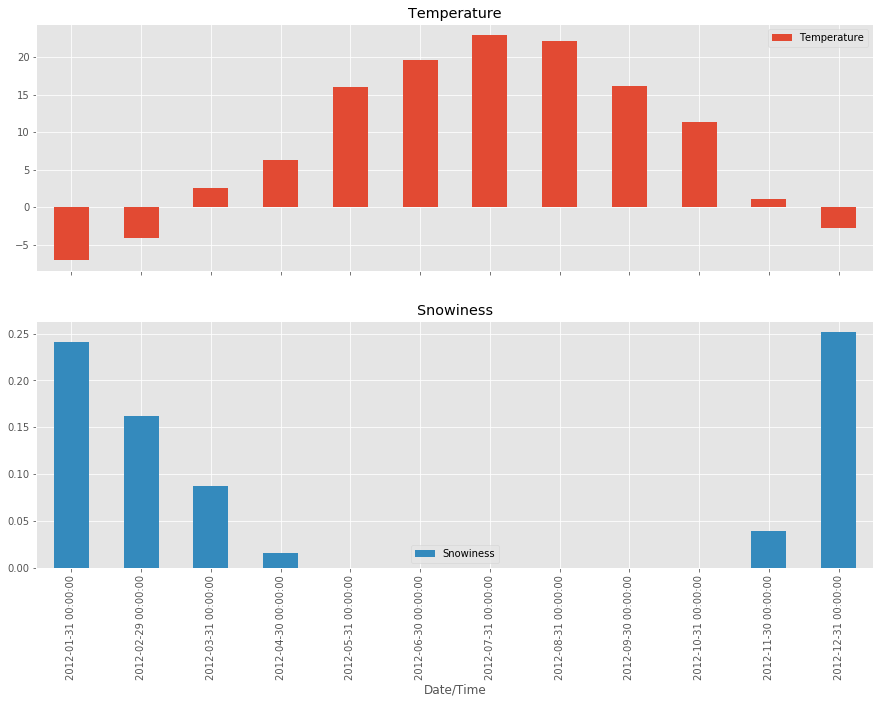

In [28]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))